<a href="https://colab.research.google.com/github/inigoER/Neural-networks/blob/main/Sentinel-2A/Modelos_USA_F%C3%B3sforo_Sentinel_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación

In [1]:
!pip install openpyxl --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
def remove_out(DataIn, colName):
  q_l=DataIn[colName].quantile(0.25)
  q_h=DataIn[colName].quantile(0.75)
  IQR=q_h-q_l
  OutRange=IQR*1.5
  qoutl=(q_l-OutRange)
  qouth=(q_h+OutRange)
  DataOut=DataIn[(DataIn[colName] < qouth) & (DataIn[colName] > qoutl)]
  return DataOut
def getQuartiles(df,col):
  quartArray=(df[col].quantile(0),df[col].quantile(0.25),df[col].quantile(0.5),df[col].quantile(0.75),df[col].quantile(1))
  return quartArray

In [4]:
data=pd.read_excel("Base de Fosforo con bandas USA Sentinel 2A.xlsx")
data.isnull().sum(axis=0)

Unnamed: 0     0
Lat            0
Lon            0
Fecha          0
Fosforo        0
Fecha_ref      0
Fecha_plus     0
Fecha_less     0
Actual_Date    0
B1             0
B2             0
B3             0
B4             0
B5             0
B6             0
B7             0
B8             0
B8A            0
B9             0
B11            0
B12            0
dtype: int64

In [5]:
dataAnalisis=data.drop(labels=['Unnamed: 0','Lat','Lon','Fecha','Fecha_ref','Fecha_plus','Fecha_less','Actual_Date'], axis=1)
dataAnalisis.isnull().sum(axis=0)

Fosforo    0
B1         0
B2         0
B3         0
B4         0
B5         0
B6         0
B7         0
B8         0
B8A        0
B9         0
B11        0
B12        0
dtype: int64

In [6]:
dataAnalisis=dataAnalisis.reset_index()
dataAnalisis=dataAnalisis.drop('index',axis=1)
for col in dataAnalisis:
  if col!='Fosforo':
    max=dataAnalisis[col].max()
    min=dataAnalisis[col].min()
  #Asegurarse de que la feature tenga valores distintos, o sea una desviación mayor a 0.
    if max!=min:
      dataAnalisis[col]=dataAnalisis[col].apply(
          lambda value: (value)/(20000)
          )
  #Si la feature tiene una desviación de 0 (todos sus valores son iguales), desecharla
    else:
      dataAnalisis.drop(col,axis=1)
dataAnalisis

,Fosforo,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B11,B12
0,0.07,0.00925,0.01835,0.03750,0.03520,0.03480,0.01125,0.01060,0.00845,0.00380,0.00005,0.00005,0.00005
1,0.04,0.01240,0.01295,0.02420,0.01050,0.01295,0.00400,0.00310,0.00435,0.00265,0.00005,0.00140,0.00155
2,0.04,0.01930,0.02790,0.03730,0.02600,0.02325,0.00745,0.00780,0.00730,0.00440,0.00080,0.00140,0.00170
3,0.06,0.02415,0.03330,0.04875,0.04040,0.04085,0.01590,0.01430,0.01285,0.00730,0.00040,0.00065,0.00065
4,0.05,0.01690,0.02595,0.03695,0.02365,0.02005,0.00335,0.00435,0.00265,0.00115,0.00005,0.00125,0.00170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.03,0.01510,0.01970,0.02990,0.01495,0.01100,0.00390,0.00410,0.00390,0.00270,0.00010,0.00165,0.00160
466,0.03,0.01550,0.02145,0.02780,0.01325,0.00995,0.00450,0.00460,0.00415,0.00265,0.00100,0.00165,0.00110
467,0.03,0.01475,0.02090,0.02985,0.01595,0.01150,0.00310,0.00370,0.00325,0.00215,0.00005,0.00215,0.00185
468,0.06,0.03330,0.04800,0.06210,0.06500,0.07125,0.06110,0.06250,0.06180,0.05685,0.01320,0.00985,0.00915


#EDA

##Histograma

In [7]:
fig = px.histogram(dataAnalisis, x="Fosforo")
fig.show()

## Correlaciones

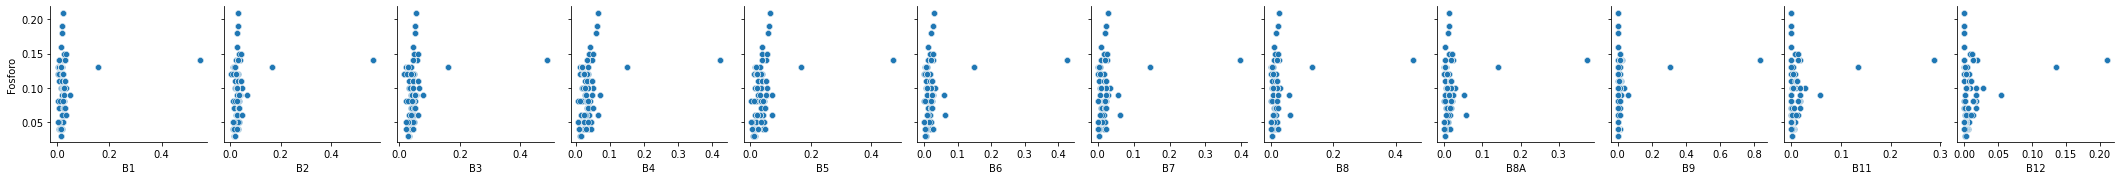

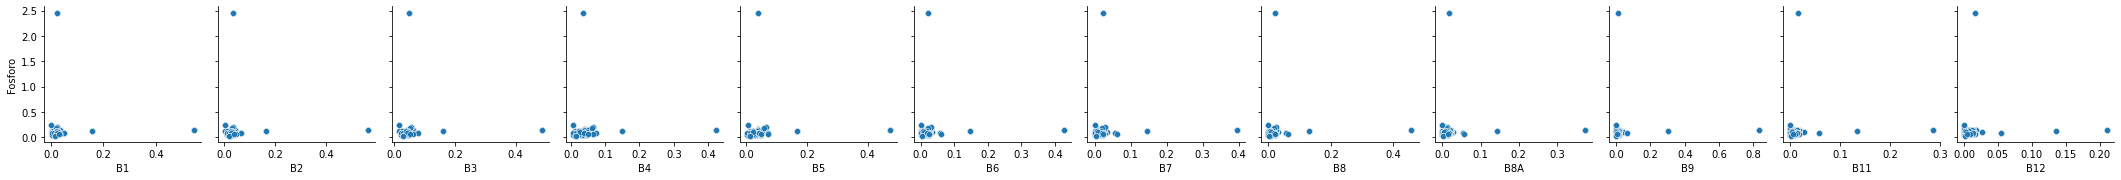

In [9]:
import seaborn as sns
sns.pairplot(remove_out(dataAnalisis, 'Fosforo'),x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B9", "B11", "B12"],
    y_vars=["Fosforo"])
sns.pairplot(dataAnalisis,x_vars=["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A", "B9", "B11", "B12"],
    y_vars=["Fosforo"])

## Líneas

In [10]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.150

In [11]:
qFosforo=getQuartiles(dataAnalisis, 'Fosforo')

In [12]:
dataAnalisis1=dataAnalisis.loc[(dataAnalisis['Fosforo']>=qFosforo[0]) & (dataAnalisis['Fosforo']<=qFosforo[1])]
dataAnalisis2=dataAnalisis.loc[(dataAnalisis['Fosforo']>=qFosforo[1]) & (dataAnalisis['Fosforo']<=qFosforo[2])]
dataAnalisis3=dataAnalisis.loc[(dataAnalisis['Fosforo']>=qFosforo[2]) & (dataAnalisis['Fosforo']<=qFosforo[3])]
dataAnalisis4=dataAnalisis.loc[(dataAnalisis['Fosforo']>=qFosforo[3]) & (dataAnalisis['Fosforo']<=qFosforo[4])]

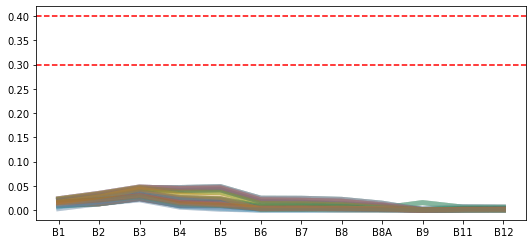

In [13]:
for index, row in dataAnalisis1.drop('Fosforo',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

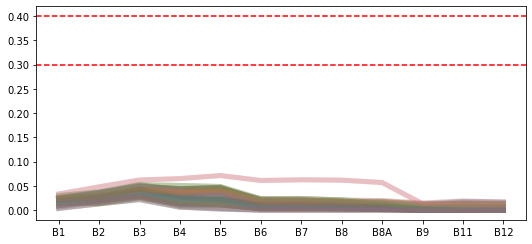

In [14]:
for index, row in dataAnalisis2.drop('Fosforo',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

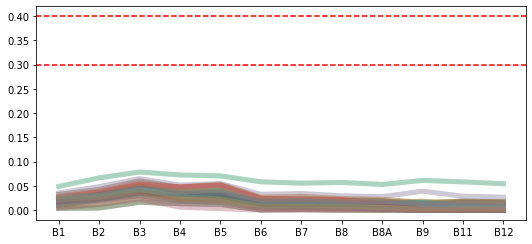

In [15]:
for index, row in dataAnalisis3.drop('Fosforo',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

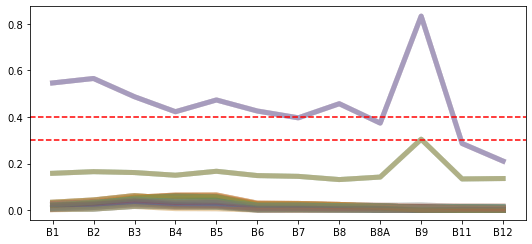

In [16]:
for index, row in dataAnalisis4.drop('Fosforo',axis=1).iterrows():
  line=plt.plot(row, alpha=overlapping,lw=5)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axhline(y=0.3, color='r', linestyle='--')
plt.show()

# Modelos

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
Y = dataAnalisis['Fosforo']
X = dataAnalisis.drop(labels=['Fosforo'], axis=1)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Random forrest

In [80]:
rfn = RandomForestRegressor(max_depth=8)
rfn.fit(X_train, Y_train)

RandomForestRegressor(max_depth=8)

In [81]:
Yr_test=rfn.predict(X_test)
Yr_train=rfn.predict(X_train)

In [82]:
mean_squared_error(Yr_test,Y_test)

8.107917132818562e-05

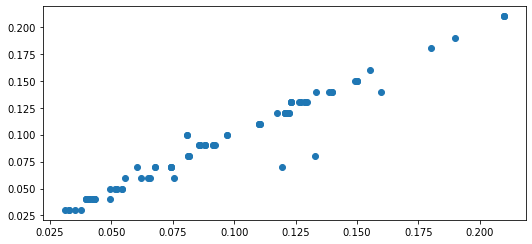

In [83]:
plt.scatter(Yr_test, Y_test)
plt.show()

In [84]:
mean_squared_error(Yr_train,Y_train)

0.00032830847733985387

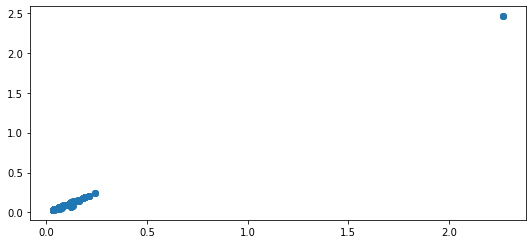

In [85]:
plt.scatter(Yr_train, Y_train)
plt.show()

## Regresión lineal

In [86]:
lr=linear_model.LinearRegression()
lr=lr.fit(X_train, Y_train)
print(lr.intercept_)
print(lr.coef_)

0.06861585186440773
[ -7.95752933   3.42961397   0.1630984   -5.98249828   8.66155215
 -52.58256841  31.48902971  40.53694506 -26.68293818  -0.38076248
  -8.0790421   22.77833947]


In [87]:
Yl_test=lr.predict(X_test)
Yl_train=lr.predict(X_train)

In [88]:
mean_squared_error(Yl_test,Y_test)

0.0046683580141961695

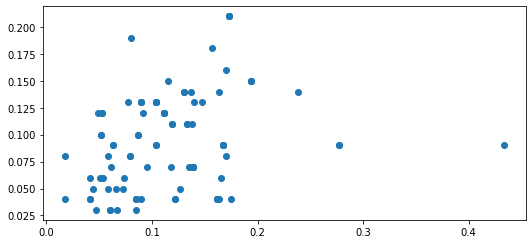

In [89]:
plt.scatter(Yl_test, Y_test)
plt.show()

In [90]:
mean_squared_error(Yl_train,Y_train)

0.04265398950669235

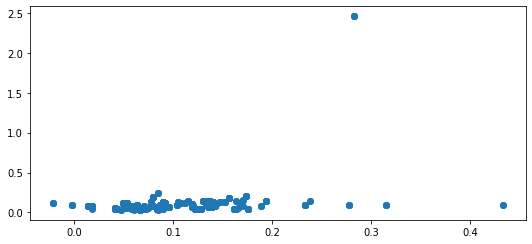

In [91]:
plt.scatter(Yl_train, Y_train)
plt.show()

## Red neuronal

In [92]:
nnw = MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(64,16,8), max_iter=100000)
nnw.fit(X_train, Y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(64, 16, 8), max_iter=100000)

In [93]:
Yn_test=nnw.predict(X_test)
Yn_train=nnw.predict(X_train)

In [94]:
mean_squared_error(Yn_test,Y_test)

0.0025055733458045986

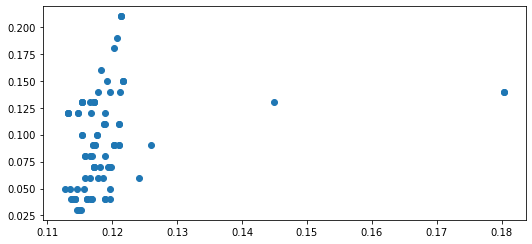

In [95]:
plt.scatter(Yn_test, Y_test)
plt.show()

In [96]:
mean_squared_error(Yn_train,Y_train)

0.04636178820326833

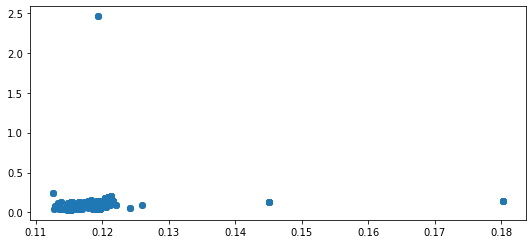

In [97]:
plt.scatter(Yn_train, Y_train)
plt.show()

##Métricas

In [98]:
Dataset=['Fosforo','Fosforo','Fosforo']
Model=['RFR','SLR','MLPR']
MSETest=[mean_squared_error(Yr_test,Y_test), mean_squared_error(Yl_test,Y_test),mean_squared_error(Yn_test,Y_test)]
MSETrain=[mean_squared_error(Yr_train,Y_train), mean_squared_error(Yl_train,Y_train), mean_squared_error(Yn_train,Y_train)]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
MSETestpd = pd.DataFrame(MSETest)
MSETestpd.columns=['MSETest']
MSETrainpd = pd.DataFrame(MSETrain)
MSETrainpd.columns = ['MSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']

Track = Datasetpd.join(Modelpd)
Track = Track.join(MSETestpd)
Track = Track.join(MSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)

Track

,Dataset,Modelo,MSETest,MSETrain,Min,Max
0,Fosforo,RFR,0.000081,0.000328,0.03,2.46
1,Fosforo,SLR,0.004668,0.042654,0.03,2.46
2,Fosforo,MLPR,0.002506,0.046362,0.03,2.46


In [99]:
Dataset=['Fosforo','Fosforo','Fosforo']
Model=['RFR','SLR','MLPR']
RMSETest=[np.sqrt(mean_squared_error(Yr_test,Y_test)), np.sqrt(mean_squared_error(Yl_test,Y_test)),np.sqrt(mean_squared_error(Yn_test,Y_test))]
RMSETrain=[np.sqrt(mean_squared_error(Yr_train,Y_train)), np.sqrt(mean_squared_error(Yl_train,Y_train)), np.sqrt(mean_squared_error(Yn_train,Y_train))]
minarr=[dataAnalisis.min()[0],dataAnalisis.min()[0],dataAnalisis.min()[0]]
maxarr=[dataAnalisis.max()[0],dataAnalisis.max()[0],dataAnalisis.max()[0]]
PercentageTest=[np.sqrt(mean_squared_error(Yr_test,Y_test))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min()),np.sqrt(mean_squared_error(Yl_test,Y_test))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min()), np.sqrt(mean_squared_error(Yn_test,Y_test))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min())]
PercentageTrain=[np.sqrt(mean_squared_error(Yr_train,Y_train))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min()),np.sqrt(mean_squared_error(Yl_train,Y_train))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min()), np.sqrt(mean_squared_error(Yn_train,Y_train))/(remove_out(dataAnalisis,'Fosforo')['Fosforo'].max()-remove_out(dataAnalisis,'Fosforo')['Fosforo'].min())]
Datasetpd = pd.DataFrame(Dataset)
Datasetpd.columns = ['Dataset']
Modelpd = pd.DataFrame(Model)
Modelpd.columns=['Modelo']
RMSETestpd = pd.DataFrame(RMSETest)
RMSETestpd.columns=['RMSETest']
RMSETrainpd = pd.DataFrame(RMSETrain)
RMSETrainpd.columns = ['RMSETrain']
minpd = pd.DataFrame(minarr)
minpd.columns = ['Min']
maxpd = pd.DataFrame(maxarr)
maxpd.columns = ['Max']
PercTestpd=pd.DataFrame(PercentageTest)
PercTestpd.columns = ['Porcentaje de error test']
PercTrainpd=pd.DataFrame(PercentageTrain)
PercTrainpd.columns = ['Porcentaje de error train']

Track = Datasetpd.join(Modelpd)
Track = Track.join(RMSETestpd)
Track = Track.join(RMSETrainpd)
Track = Track.join(minpd)
Track = Track.join(maxpd)
Track = Track.join(PercTestpd)
Track = Track.join(PercTrainpd)

Track

,Dataset,Modelo,RMSETest,RMSETrain,Min,Max,Porcentaje de error test,Porcentaje de error train
0,Fosforo,RFR,0.009004,0.018119,0.03,2.46,0.050024,0.100663
1,Fosforo,SLR,0.068325,0.206528,0.03,2.46,0.379585,1.147380
2,Fosforo,MLPR,0.050056,0.215318,0.03,2.46,0.278087,1.196210
